<a href="https://colab.research.google.com/github/manutdallas/NumPySavvy/blob/main/numpy_essentials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

In [3]:
"""
  A NumPy array is a grid of values, all of the same type, and is indexed by tuple of non-negative integers. The
  number of dimensions is the rank of the array; shape of an array is the tuple of integers giving the size of the
  array along each dimension.

  We can initialize NumPy arrays with nested python lists, and access elements using square brackets.
"""

a = np.array([1, 2, 3])               # creates a rank 1 NumPy array
print(type(a))                        # prints the type of the array
print(a.shape)                        # prints the shape of the array
print(a[0], a[1], a[2])               # way to access elements in array


b = np.array([[1, 2, 3], [4, 5, 6]])  # creates a rank 2 NumPy array
print(b.shape)
print(b[0,1], b[0,2], b[1,2])

c = np.array([[[1, 2], [3, 4]],
              [[5, 6], [7, 8]]])      # creates a rank 3 NumPy array
print(c.shape)
print(c[0,1,0], c[1,1,1], c[0,1,1])

<class 'numpy.ndarray'>
(3,)
1 2 3
(2, 3)
2 3 6
(2, 2, 2)
3 8 4


In [4]:
"""
  NumPy also provides many functions to create arrays.

  1D array creation functions
"""

a = np.arange(10)                     # creates an array with regularly incrementing values
print("a :: ", a)

b = np.arange(0, 10, dtype=float)
print("b :: ", b)

c = np.arange(1, 2, 0.1)
print("c :: ", c)

d = np.linspace(1, 4, 10)             # creates an array of 10 values spaced equally in [1, 4]
print("d :: ", d)

a ::  [0 1 2 3 4 5 6 7 8 9]
b ::  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
c ::  [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
d ::  [1.         1.33333333 1.66666667 2.         2.33333333 2.66666667
 3.         3.33333333 3.66666667 4.        ]


In [5]:
"""
  2D array creation functions
"""
a = np.zeros((2,2))                   # creates an array filled with zeros
print("a :: ", a)

b = np.ones((2,2))                    # creates an array filled with ones
print("b :: ", b)

c = np.full((3,3), 7)                 # creates an array filled with 7
print("c :: ", c)

d = np.eye(3)                         # creates an identity matrix 3x3
print("d :: ", d)

e = np.random.random((3,3))           # creates an array of random values ranging [0.0, 1.0)
print("e :: ", e)

f = np.diag([1, 2, 3])                # creates a diagonal matrix
print("f :: ", f)

g = np.diag(e)                        # extracts diagonal elements from e as 1D NumPy array
print("g :: ", g)

a ::  [[0. 0.]
 [0. 0.]]
b ::  [[1. 1.]
 [1. 1.]]
c ::  [[7 7 7]
 [7 7 7]
 [7 7 7]]
d ::  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
e ::  [[0.08804044 0.49022262 0.84275982]
 [0.68391817 0.4782204  0.05167711]
 [0.5488495  0.58687447 0.48000704]]
f ::  [[1 0 0]
 [0 2 0]
 [0 0 3]]
g ::  [0.08804044 0.4782204  0.48000704]


In [6]:
"""
  When operating on NumPy arrays, it is possible to access the internal data buffer directly using
  a view without copying data around. This ensures better performance but can also cause unwarranted
  problems if we are not aware of how this works.

  NumPy array is a data structure consisting of two parts : contiguous data buffer with the actual data
  elements and the metadata that contains information about the data buffer. Basically, metadata includes
  information about the data type, strides and other information the helps manipulate the NumPy array easily.

  Replicating NumPy arrays i.e. copies and views.

  Views
  It is possible to access the array differently by jsut changing certain metadata like stride and dtype without
  changing the data buffer. Any changes made to the view reflects in the original copy.

  Copy
  When a new array is created by copying the data buffer as well as the metadata, it is called a copy. Changes
  made of the copy do not reflect to the original copy.
"""

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = a.view()                                  # creates a view b of NumPy array a

b[0,0] = 5                                    # making changes in b and it reflects in a as well.

print(b)
print(a)

c = a.copy()                                  # creates a copy c of the NumPy array a

c[0,0] = 6                                    # making changes in c and it won't reflect in a

print(c)
print(a)

d = a[0:1, :]                                 # this creates a view and any changes made to d will reflect in a
print(d)
d[0,0] = 9
print(d)
print(a)

[[5 2 3]
 [4 5 6]
 [7 8 9]]
[[5 2 3]
 [4 5 6]
 [7 8 9]]
[[6 2 3]
 [4 5 6]
 [7 8 9]]
[[5 2 3]
 [4 5 6]
 [7 8 9]]
[[5 2 3]]
[[9 2 3]]
[[9 2 3]
 [4 5 6]
 [7 8 9]]


In [7]:
"""
  Broadcasting describes how numpy treats arrays with different shapes during arithmetic operations.
  Subject to contraints, the smaller array is braodcast across the large array so that they can have
  compatible shapes.
  Broadcasting provides a way to vectorizing array operations so that looping occurs in C instead of python.
  It does this without making needless copies of data and usually leads to efficient algorithm implementations.

  When operating on two arrays, numpy compares there shape element-wise (right -> left). Two dimensions are compatible
  when they are equal or one of them is 1. (If these conditions not met, ValueError exception is thrown)

  A :: 8 x 1 x 6 x 1
  B ::     7 x 1 x 5

  result :: 8 x 7 x 6 x 5
"""

a = np.array([1, 2, 3])
b = 2

c = a * b   # b being stretched to np.array([2, 2, 2]) during arithmetic operation.
print("value of c :: ", c)

d = np.array([0, 10, 20, 30])
e = np.array([1, 2, 3])

#f = d + e    # produces ValueError

f = d[:, np.newaxis] + e  # works fine because of trailing dimension matching(one of them is 1).
print("value of f :: ", f)

value of c ::  [2 4 6]
value of f ::  [[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]]


In [8]:
"""
  NumPy offers several ways to index into arrays.
  Slicing : Similar to python lists, numpy arrays can be sliced. We must specify a slice for
            each dimension of the array.
"""

a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

b = a[1, :]       # creates Rank 1 view
c = a[1:2, :]     # creates Rank 2 view

print("Shape of b ::", b.shape)
print("Shape of c ::", c.shape)

"""
  Integer array indexing : slicing creates views but integer array indexing allows you to contruct
                           arbitrary arrays using data from another array.
"""

d = np.array([[1, 2], [3, 4], [5, 6]])
e = d[[0, 1, 2], [0, 1, 0]]
print("value of e :: ", e)

"""
  Boolean array indexing : It lets you picks out arbitrary elements of an array. Frequently this type of indexing
                           is used to select the elements of an array the satisfy some condition.
"""

f = d[d > 2]        # picks out all elements in d which are greater than 2
print("valud of f :: ", f)
f[f > 4] = 0        # resolves doubts about views and copies
print("value of f :: ", f)
print("value of d :: ", d)

Shape of b :: (4,)
Shape of c :: (1, 4)
value of e ::  [1 4 5]
valud of f ::  [3 4 5 6]
value of f ::  [3 4 0 0]
value of d ::  [[1 2]
 [3 4]
 [5 6]]


In [9]:
"""
  Few other the useful matrix operations are sum and transpose.
"""

a = np.array([[1,2],[3,4]])

b = a.T
c = np.sum(a, axis=0)
d = np.sum(a, axis=1)

print("a :: ", a)
print("b :: ", b)
print("c :: ", c)
print("d :: ", d)

a ::  [[1 2]
 [3 4]]
b ::  [[1 3]
 [2 4]]
c ::  [4 6]
d ::  [3 7]


In [10]:
"""
  NumPy features
  Linear algebra on n-dimensional arrays
"""

from scipy.datasets import face
img = face()

In [11]:
type(img)

numpy.ndarray

In [12]:
img.shape

(768, 1024, 3)

In [13]:
# R channel of RGB image
img[:,:,0].shape

(768, 1024)

In [14]:
# Normalizing the image
img_array = img/255

In [15]:
img_array.shape

(768, 1024, 3)

In [16]:
img_array.max(), img_array.min()

(1.0, 0.0)

In [17]:
# Y = 0.2126R + 0.7153G + 0.0722B
img_gray = img_array @ [0.2126, 0.7153, 0.0722]

In [18]:
img_gray.shape

(768, 1024)

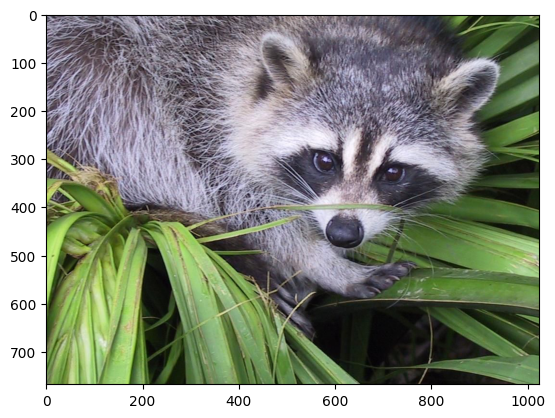

In [19]:
from matplotlib import pyplot as plt
plt.imshow(img_array)
plt.show()

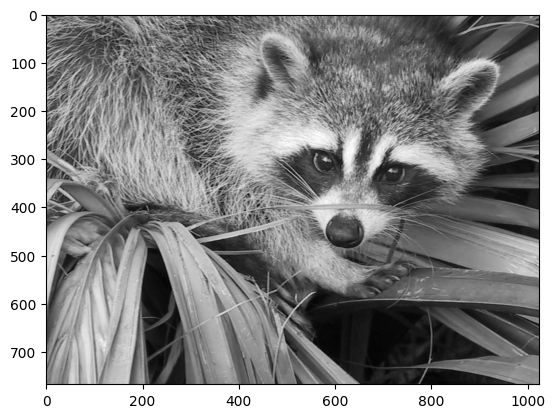

In [20]:
plt.imshow(img_gray, cmap='gray')
plt.show()

In [21]:
"""
  Now we will perform svd operation on it and reconstruct the image.
"""
from numpy import linalg
u, s, vt = linalg.svd(img_gray)

In [22]:
u.shape, s.shape, vt.shape

((768, 768), (768,), (1024, 1024))

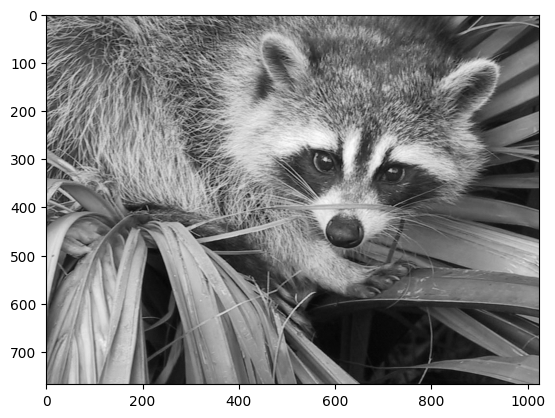

In [23]:
# Here s is not compatible to be multiplied with vt

sigma = np.zeros((u.shape[1], vt.shape[0]))
np.fill_diagonal(sigma, s)

# Now lets approximate the image using top k singular values
k = 400
img_approx = u @ sigma[:, :k] @ vt[:k, :]
plt.imshow(img_approx, cmap='gray')
plt.show()

In [24]:
# Now we are doing the smae thing for RGB image
img_array.shape

(768, 1024, 3)

In [25]:
# NumPy expocts to see the array of the form (c, H, W). So we can apply transpose function
img_array_transposed = np.transpose(img_array, (2,0,1))
img_array_transposed.shape

(3, 768, 1024)

In [26]:
u, s, vt = linalg.svd(img_array_transposed)
u.shape, s.shape, vt.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

In [27]:
sigma = np.zeros((3, 768, 1024))
for i in range(3):
  np.fill_diagonal(sigma[i,:,:], s[i,:])
sigma.shape

(3, 768, 1024)

In [28]:
k = 50
img_approx = u @ sigma[..., :k] @ vt[...,:k,:]
img_approx.shape

(3, 768, 1024)

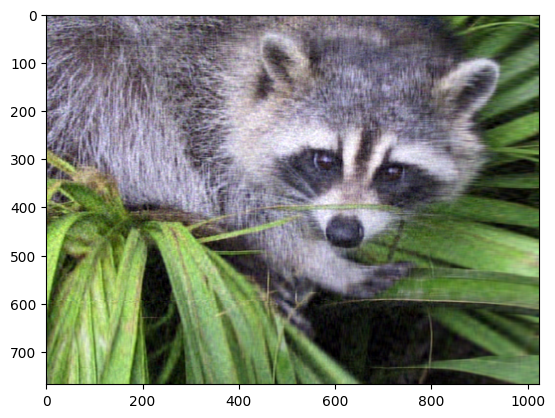

In [29]:
recon = np.clip(img_approx, 0, 1)
plt.imshow(np.transpose(recon, (1, 2, 0)))
plt.show()

In [30]:
"""
  Saving and sharing of numpy arrays
"""

x = np.arange(10)
y = x ** 2
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]


In [31]:
# we can save x and y in a file as zipped arrays using savez
np.savez("x_y-squared.npz", x_axis=x, y_axis=y)

In [32]:
del x, y

In [33]:
load_xy = np.load("x_y-squared.npz")

In [34]:
print(load_xy.files)

['x_axis', 'y_axis']


In [35]:
x = load_xy['x_axis']
y = load_xy['y_axis']
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]


In [36]:
"""
  Another most commonly used format is csv.
"""

csv_arr = np.block([x[:, np.newaxis], y[:, np.newaxis]])
print(csv_arr.shape)

(10, 2)


In [37]:
np.savetxt("x_y-squared.csv", csv_arr, header="x, y", delimiter=',')

In [38]:
load_xy = np.loadtxt("x_y-squared.csv", delimiter=',')
print(load_xy.shape)

(10, 2)


In [39]:
"""
  NumPy masked arrays
  Consider we have a dataset with missing or invalid entries. If we are doing any kind of processing on this data,
  we might want to skip or flag these unwanted entries without just deleting them, you may have to use conditionals
  or filter your data somehow. The numpy.ma module provides some of the same functionality of numpy.ndarrays with
  added structure to ensure invalid entries are not used in computation.

  A masked array is the combination of a standard numpy.ndarray and a mask. A mask is either nomaks indicating all
  values are valid, or an array of booleans that determines for each element of the associated array whether the
  value is valid or not. When an element of the mask is true, the corresponding element of the associated array is
  said to be masked(invalid).
"""

nbcases = np.random.randint(10, 1000, (1000,100))
nbcases[nbcases < 100] = -1
# Lets assume nbcases is the data matrix we have and all of the -1 values are invalid
nbcases

array([[268, 653, 876, ..., 146, 273, 155],
       [451, 338, 424, ..., 768, 888, 773],
       [272,  -1, 621, ..., 186, 209, 899],
       ...,
       [238, 301, 166, ..., 664, 522, 892],
       [565,  -1, 194, ..., 726, 276, 411],
       [348, 463, 427, ..., 175, 396, 633]])

In [40]:
nbcases_mask = np.ma.masked_values(nbcases, -1)
nbcases_mask

masked_array(
  data=[[268, 653, 876, ..., 146, 273, 155],
        [451, 338, 424, ..., 768, 888, 773],
        [272, --, 621, ..., 186, 209, 899],
        ...,
        [238, 301, 166, ..., 664, 522, 892],
        [565, --, 194, ..., 726, 276, 411],
        [348, 463, 427, ..., 175, 396, 633]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False,  True, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False,  True, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=-1)

In [51]:
"""
  Few other important numpy functions every developer should know are stack, hstack, vstack, block, tile etc..
  Let's understand these functions with examples.
"""
# Here is the example for stack function.
arrays = [np.random.randn(3,4) for _ in range(10)]
a = np.stack(arrays, axis=0)
b = np.stack(arrays, axis=1)
c = np.stack(arrays, axis=2)
print(a.shape)
print(b.shape)
print(c.shape)

d = np.array([1, 2, 3])
e = np.array([4, 5, 6])
print(np.stack((d,e)))
print((np.stack((d,e), axis=-1)))

(10, 3, 4)
(3, 10, 4)
(3, 4, 10)
[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


In [57]:
# Here we will see examples for concatenate function.
a = np.array([[1,2], [3,4]])
b = np.array([[5,6]])
c = np.concatenate((a,b), axis=0)
d = np.concatenate((a,b.T), axis=1)
print(c)
print(d)


[[1 2]
 [3 4]
 [5 6]]
[[1 2 5]
 [3 4 6]]


In [58]:
# Here we will see examples for hstack function. It is same as concatenation at axis=1.
a = np.array([[1], [2], [3]])
b = np.array([[4], [5], [6]])
c = np.hstack((a,b))
print(c)

[[1 4]
 [2 5]
 [3 6]]


In [59]:
# Here we will see example of vstack function.
d = np.vstack((a,b))
print(d)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [62]:
# Here we will see example of tile function.
a = np.array([1,2])
b = np.tile(a, 2)
print(b)
c = np.tile(a, (2,2))
print(c)

[1 2 1 2]
[[1 2 1 2]
 [1 2 1 2]]
